# Feature importance
In this notebook we illustrate the computation of feature importance for a gaussian process.

In [1]:
from fastai.tabular import *
from tabularGP import tabularGP_learner

## Data

Builds a regression problem on a subset of the adult dataset:

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv').sample(1000)
procs = [FillMissing, Normalize, Categorify]

In [3]:
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'salary']
cont_names = ['education-num', 'fnlwgt']
dep_var = 'age'

In [4]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                  .split_by_rand_pct()
                  .label_from_df(cols=dep_var, label_cls=FloatList)
                  .databunch())

## Model

In [5]:
learn = tabularGP_learner(data)

In [6]:
learn.fit_one_cycle(5, max_lr=1e-3)

epoch     train_loss  valid_loss  time    
0         7.367693    7.832406    00:02     
1         7.154828    7.377322    00:02     
2         6.953429    7.293974    00:02     
3         6.810163    7.283554    00:02     
4         58.708439   27.913225   00:02     


## Feature importance

You can get direct access to the importance of each feature, stored in a dataframe, using the `feature_importance` field.  
This information is deduced from the parameters of the kernel (mostly the scales) and can be accessed instantly:

In [10]:
learn.feature_importance

,Variable,Importance
0,workclass,0.008932
1,education,0.018838
2,marital-status,0.030513
3,occupation,0.020232
4,relationship,0.019169
5,race,0.030871
6,salary,0.022803
7,education-num_na,0.029534
8,education-num,0.028425
9,fnlwgt,0.016090


You can also plot them directly for a quick analysis (parameters are forwarded to the [Pandas plotting function](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html)):

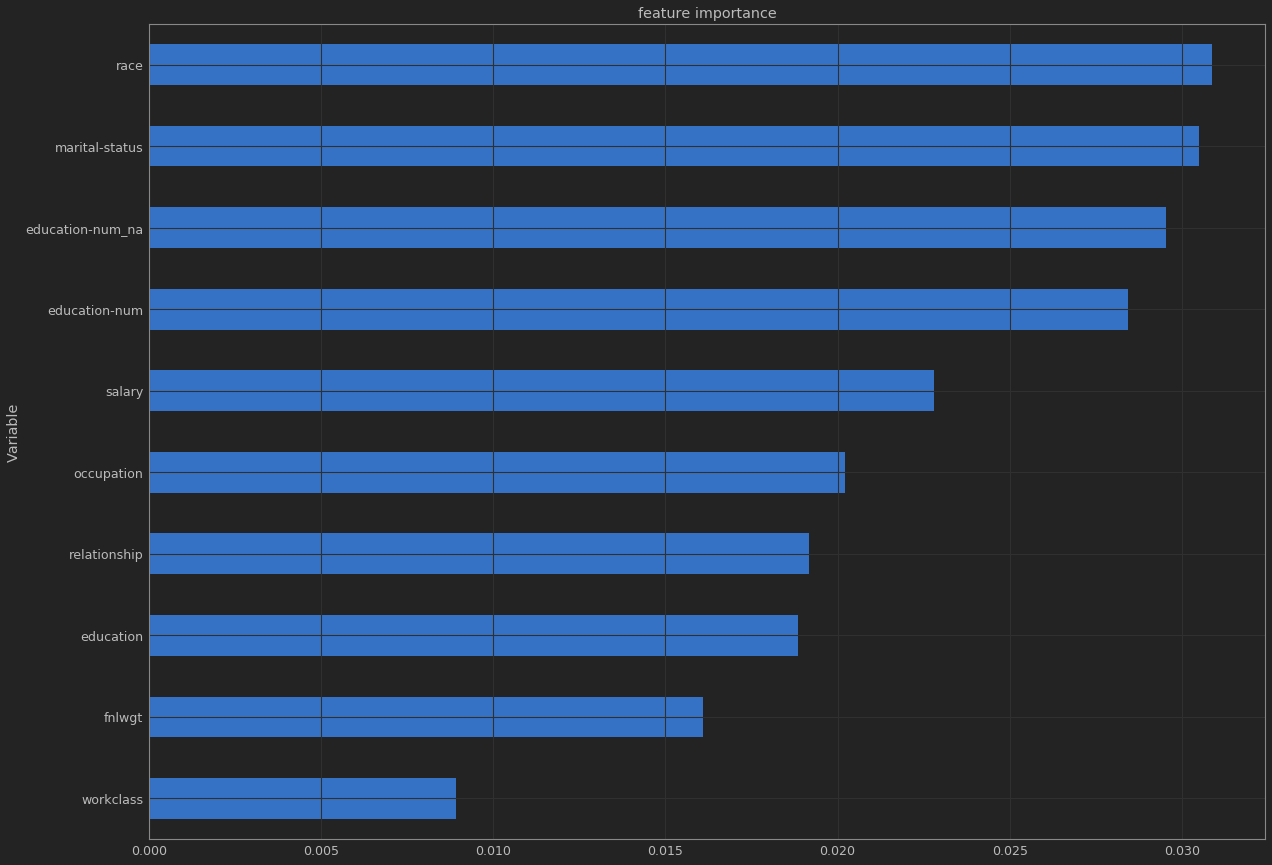

In [12]:
learn.plot_feature_importance()